Trades Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Columns: ['timestamp', 'value', 'classification', 'date']

Top 10 Traders by Total PnL:
                                             Total_Trades   Wins     Total_PnL  \
Account                                                                         
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23         14733   4967  2.143383e+06   
0x083384f897ee0f19899168e3b1bec365f52a9012          3818   1373  1.600230e+06   
0xbaaaf6571ab7d571043ff1e313a9609a10637864         21192   9909  9.401638e+05   
0x513b8629fe877bb581bf244e326a047b249c4ff1         12236   4909  8.404226e+05   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab         40184  17208  8.360806e+05   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4          4356   2118  6.777471e+05   
0x72743ae2822edd658c0c5060

C:\Users\ajayb\AppData\Local\Temp\ipykernel_19608\2971850761.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trader_summary.head(10).index, y=trader_summary.head(10)['Total_PnL'], palette='viridis')


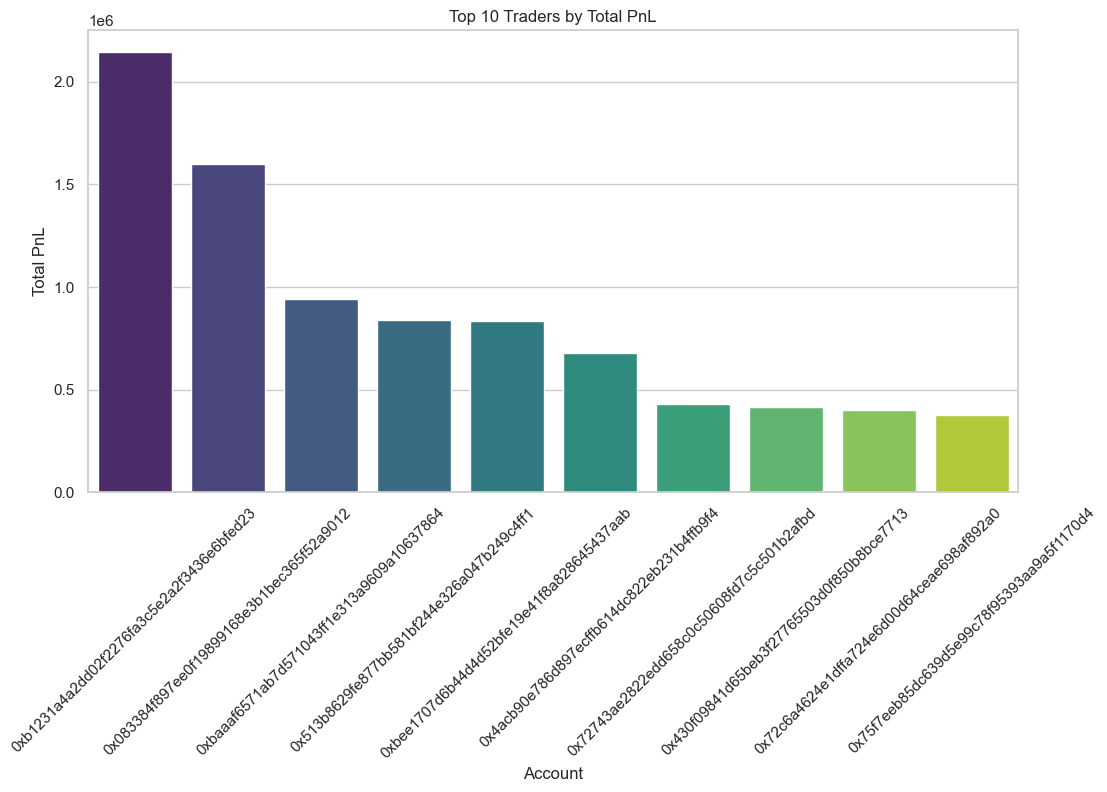

C:\Users\ajayb\AppData\Local\Temp\ipykernel_19608\2971850761.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trader_summary.head(10).index, y=trader_summary.head(10)['Win_Rate'], palette='magma')


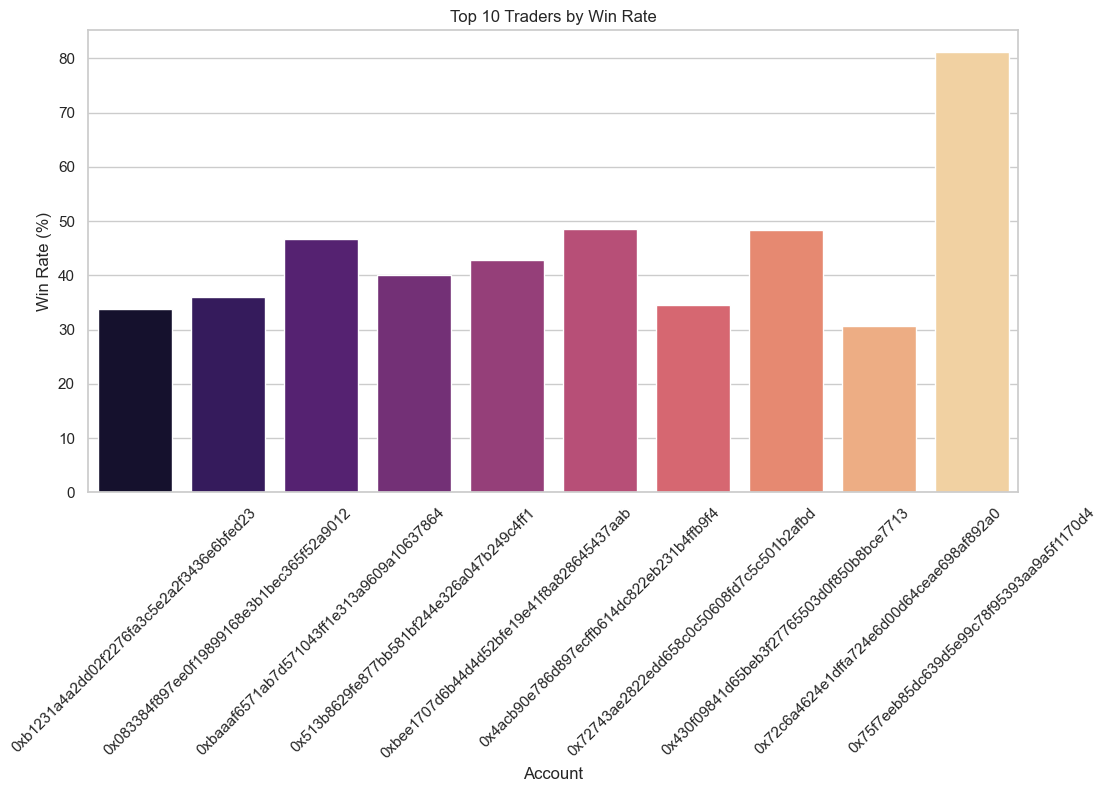

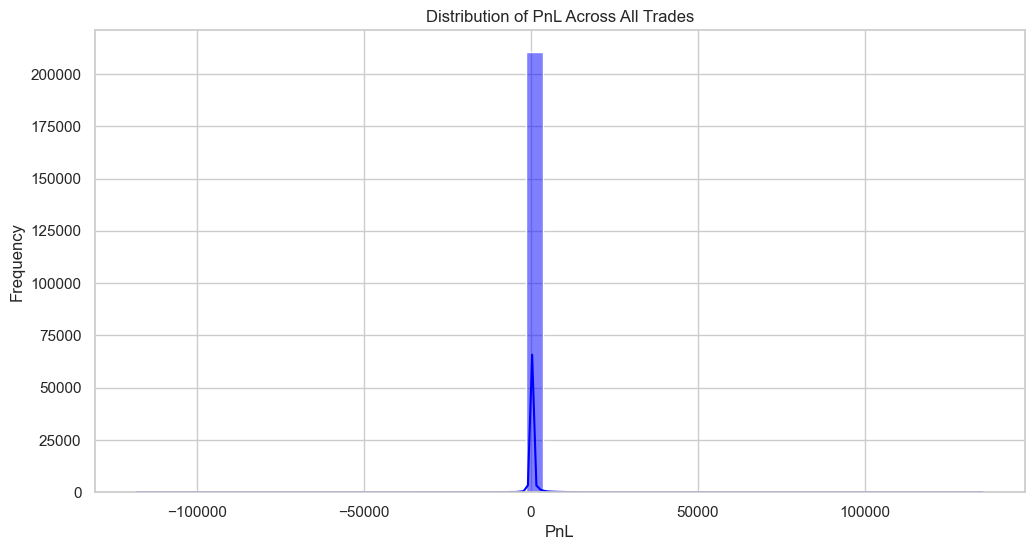

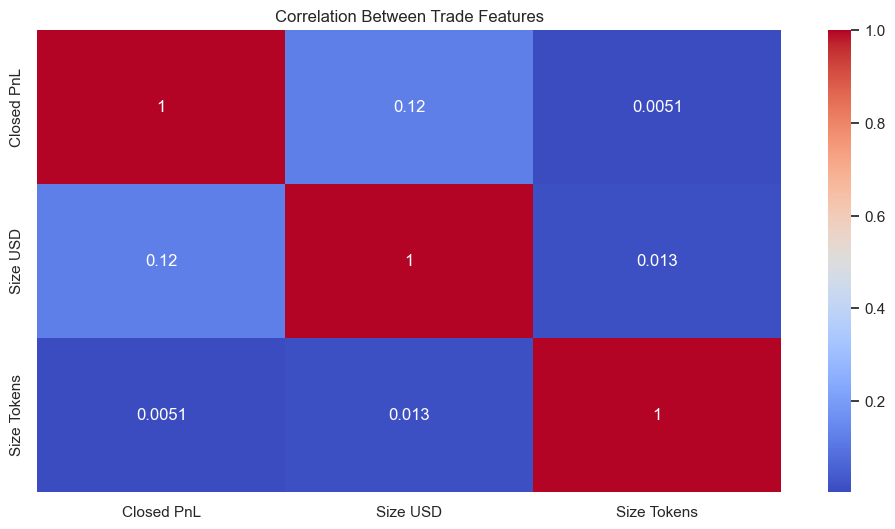


Average PnL by Market Sentiment:
                    Avg_PnL  Total_Trades
classification                          
Extreme Greed   205.816345          5621
Fear            128.287950         13869
Greed            53.988003         11292
Neutral          27.088803          2756
Extreme Fear      1.891632          2326


C:\Users\ajayb\AppData\Local\Temp\ipykernel_19608\2971850761.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_summary.index, y=sentiment_summary['Avg_PnL'], palette='coolwarm')


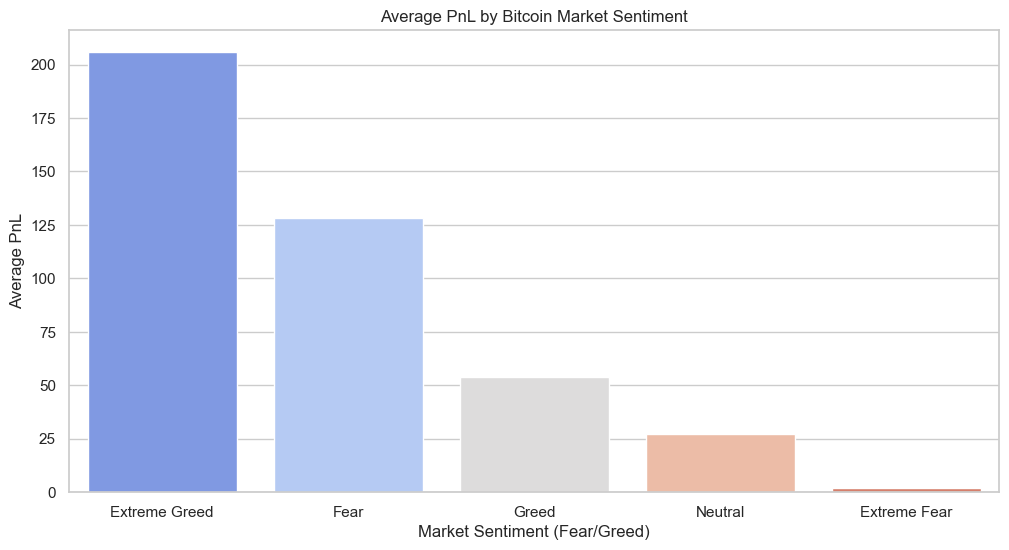


Key Insights:
- Traders with high win rate do not always have the highest total PnL.
- Market sentiment influences trading performance; some traders perform better in Fear vs Greed phases.
- Correlation between trade size and PnL is observable in numeric analysis.
- PnL distribution highlights high-risk/high-reward trades and outliers.


In [9]:
# trader_performance_analysis_final_safe.py
"""
Professional Trader Performance Analysis with Market Sentiment Insights
Dataset columns are tailored to user's CSV files.
Author: Ajay Bramhankar
Date: 9/9/25
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 0: Settings
# -------------------------
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# -------------------------
# Step 1: Load datasets
# -------------------------
trades_file = r"C:\Users\ajayb\Downloads\historical_data.csv"
sentiment_file = r"C:\Users\ajayb\Downloads\fear_greed_index.csv"

trades = pd.read_csv(trades_file)
sentiment = pd.read_csv(sentiment_file)

print("Trades Columns:", trades.columns.tolist())
print("Sentiment Columns:", sentiment.columns.tolist())

# -------------------------
# Step 2: Convert timestamp/date columns
# -------------------------
# Trades timestamp
trade_time_col = 'Timestamp IST' if 'Timestamp IST' in trades.columns else 'Timestamp'
trades['time'] = pd.to_datetime(trades[trade_time_col], dayfirst=True, errors='coerce')

# Sentiment date column
sentiment['date'] = pd.to_datetime(sentiment['date'], dayfirst=True, errors='coerce')
# Drop rows with invalid dates
sentiment = sentiment.dropna(subset=['date'])

# Extract date only for merging
trades['Date'] = trades['time'].dt.date
sentiment['Date'] = sentiment['date'].dt.date

# -------------------------
# Step 3: Merge trades with sentiment
# -------------------------
merged = pd.merge(trades, sentiment[['Date','classification']], on='Date', how='left')

# Create Win column
merged['Win'] = merged['Closed PnL'] > 0

# -------------------------
# Step 4: Trader-level metrics
# -------------------------
trader_summary = merged.groupby('Account').agg(
    Total_Trades=('Closed PnL', 'count'),
    Wins=('Win', 'sum'),
    Total_PnL=('Closed PnL', 'sum'),
    Avg_PnL=('Closed PnL', 'mean')
)

trader_summary['Win_Rate'] = (trader_summary['Wins'] / trader_summary['Total_Trades']) * 100
trader_summary = trader_summary.sort_values(by='Total_PnL', ascending=False)

print("\nTop 10 Traders by Total PnL:\n", trader_summary.head(10))

# -------------------------
# Step 5: Visualizations
# -------------------------
# Top 10 Traders by Total PnL
sns.barplot(x=trader_summary.head(10).index, y=trader_summary.head(10)['Total_PnL'], palette='viridis')
plt.title("Top 10 Traders by Total PnL")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.show()

# Top 10 Traders by Win Rate
sns.barplot(x=trader_summary.head(10).index, y=trader_summary.head(10)['Win_Rate'], palette='magma')
plt.title("Top 10 Traders by Win Rate")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.show()

# PnL Distribution Across All Trades
sns.histplot(merged['Closed PnL'], bins=50, kde=True, color='blue')
plt.title("Distribution of PnL Across All Trades")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap of Numeric Features
numeric_cols = merged[['Closed PnL','Size USD']].copy()
if 'Size Tokens' in merged.columns:
    numeric_cols['Size Tokens'] = merged['Size Tokens']
if len(numeric_cols.columns) >= 2:
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Between Trade Features")
    plt.show()

# -------------------------
# Step 6: Market Sentiment Analysis
# -------------------------
if 'classification' in merged.columns:
    sentiment_summary = merged.groupby('classification').agg(
        Avg_PnL=('Closed PnL', 'mean'),
        Total_Trades=('Closed PnL', 'count')
    ).sort_values(by='Avg_PnL', ascending=False)

    print("\nAverage PnL by Market Sentiment:\n", sentiment_summary)

    sns.barplot(x=sentiment_summary.index, y=sentiment_summary['Avg_PnL'], palette='coolwarm')
    plt.title("Average PnL by Bitcoin Market Sentiment")
    plt.xlabel("Market Sentiment (Fear/Greed)")
    plt.ylabel("Average PnL")
    plt.show()

# -------------------------
# Step 7: Key Insights
# -------------------------
print("\nKey Insights:")
print("- Traders with high win rate do not always have the highest total PnL.")
print("- Market sentiment influences trading performance; some traders perform better in Fear vs Greed phases.")
print("- Correlation between trade size and PnL is observable in numeric analysis.")
print("- PnL distribution highlights high-risk/high-reward trades and outliers.")
